In [1]:
# Author: Geethu Thottungal Harilal
# data from : https://power.larc.nasa.gov/data-access-viewer/

# This code will provide visualization plots for the annual values, lowest and highest value range,
# latest year value, average of all parameters during 2013-2023 to check the pattern over last ten years,
# and trend of all parameters over the years in all four locations

In [2]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Read data
data_en = pd.read_csv("England_dataset_cleaned.csv",parse_dates=True) #England data
data_wl = pd.read_csv("Wales_dataset_cleaned.csv",parse_dates=True) #Wales data
data_sc = pd.read_csv("Scotland_dataset_cleaned.csv",parse_dates=True) #Scotland data
data_ir = pd.read_csv("Ireland_dataset_cleaned.csv",parse_dates=True) #Northern Ireland data

## 1. Rainfall trend analysis over the year

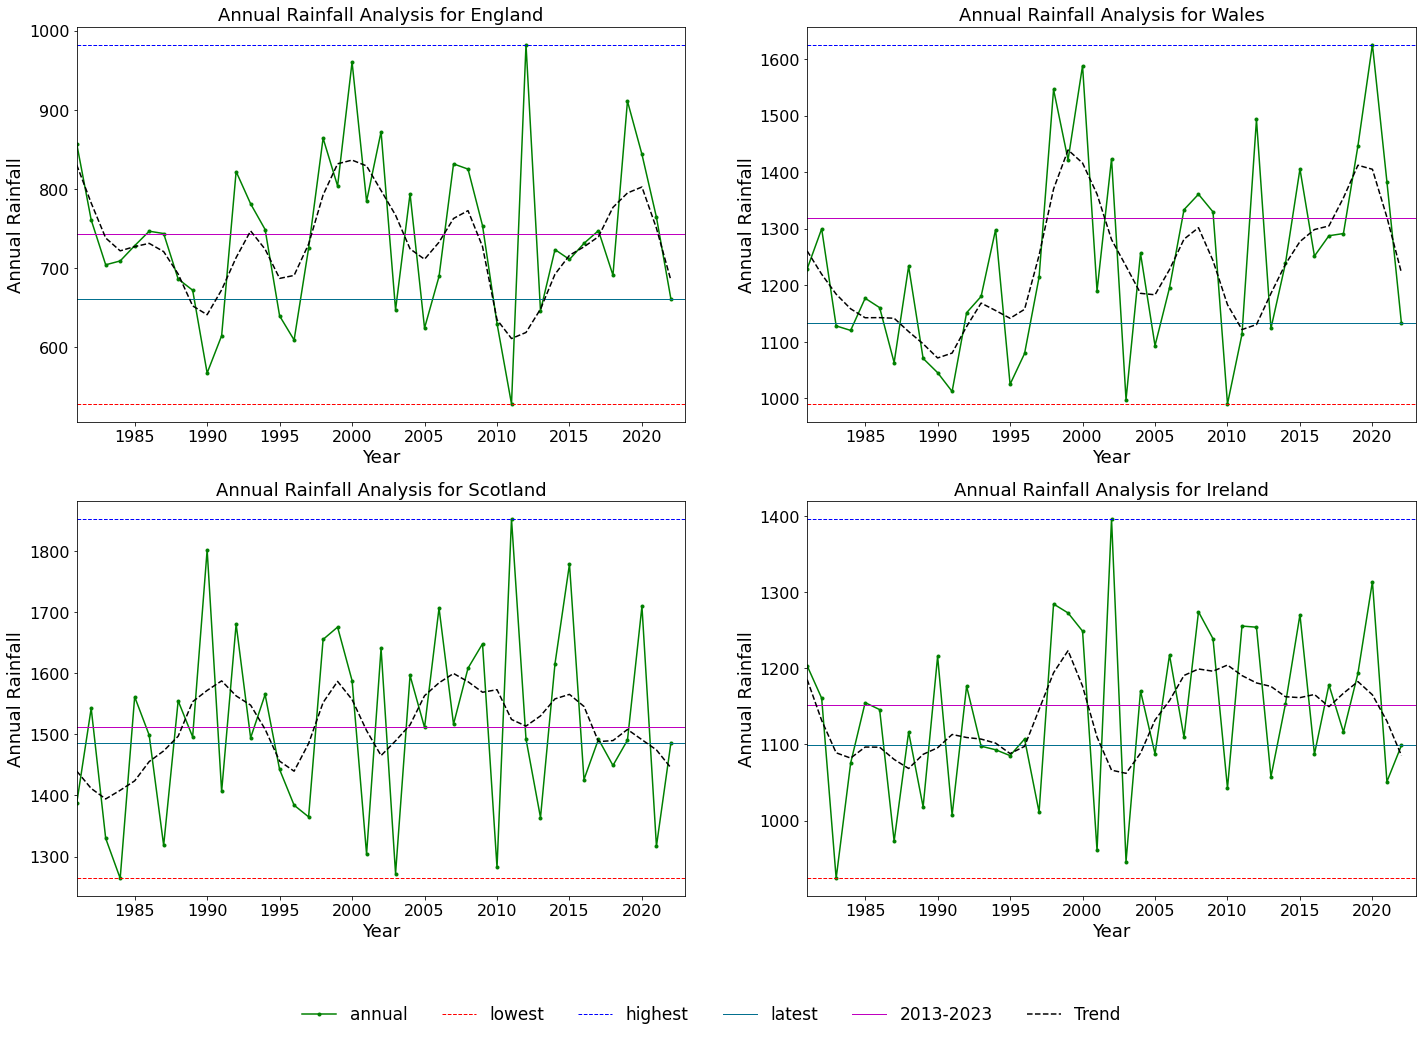

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

# Convert the 'date' column to a datetime object
data_en['date'] = pd.to_datetime(data_en['date'])
data_wl['date'] = pd.to_datetime(data_wl['date'])
data_sc['date'] = pd.to_datetime(data_sc['date'])
data_ir['date'] = pd.to_datetime(data_ir['date'])

# Extract the year from the 'date' column
data_en['year'] = data_en['date'].dt.year
data_sc['year'] = data_sc['date'].dt.year
data_wl['year'] = data_wl['date'].dt.year
data_ir['year'] = data_ir['date'].dt.year

# Calculate the yearly sum of rainfall
data_en_avg = data_en.groupby('year')['Rainfall'].sum().reset_index()
data_sc_avg = data_sc.groupby('year')['Rainfall'].sum().reset_index()
data_wl_avg = data_wl.groupby('year')['Rainfall'].sum().reset_index()
data_ir_avg = data_ir.groupby('year')['Rainfall'].sum().reset_index()

#  columns for output
data_en_avg.columns = ['year', 'ann']
data_wl_avg.columns = ['year', 'ann']
data_sc_avg.columns = ['year', 'ann']
data_ir_avg.columns = ['year', 'ann']


# List of place names and corresponding data frames
places = ['England', 'Wales', 'Scotland', 'Ireland']
data_frames = [data_en_avg, data_wl_avg, data_sc_avg, data_ir_avg]

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(24, 16))

# Initialize arrays to store common legend handles and labels
common_handles = []
common_labels = []

# Iterate over each place and its corresponding data frame
for i, (place, data) in enumerate(zip(places, data_frames)):
    # Exclude data for the year 2023
    data = data[data['year'] != 2023]
    
    # Calculate the annual sum of rainfall per year
    annual_sum = data.groupby('year')['ann'].sum()
    
    # Calculate statistics for visualization
    lowest_rainfall = annual_sum.min()
    highest_rainfall = annual_sum.max()
    latest_year = annual_sum.index[-1]
    average_rainfall_2014_2023 = annual_sum.loc[2013:2023].sum()/10
    
    # Calculate a smoothed trend line using LOWESS
    smoothed_trend_line = lowess(annual_sum.values, annual_sum.index, frac=0.15)[:, 1]
    
    # Plotting in the current subplot
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Plot the annual sum of rainfall per year with markers and specific color
    line = ax.plot(annual_sum.index, annual_sum.values,color='g', label='annual' ,linewidth=1.5,marker='o',markersize=3)
    common_handles.append(line[0])
   
    # Plot the lowest, highest, latest, and average lines
    ax.axhline(lowest_rainfall, color='r', linestyle='--', label='lowest',linewidth=1)
    ax.axhline(highest_rainfall, color='b', linestyle='--', label='highest',linewidth=1)
    ax.axhline(annual_sum[latest_year], color='#03708f',  label='latest',linewidth=1)
    ax.axhline(average_rainfall_2014_2023, color='m', label='2013-2023',linewidth=1)

    # Plot the smoothed trend line
    ax.plot(annual_sum.index, smoothed_trend_line, color='k', linestyle='--', label='Trend')

    # Set labels and title for the current subplot
    #ax.set_xlabel('Year')
    ax.set_ylabel('Annual Rainfall',fontsize=18)
    ax.set_xlabel('Year',fontsize=18)

    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_title(f'Annual Rainfall Analysis for {place}',fontsize=18)
    ax.set_xlim(1981,2023)
     # Store labels for common legend
    if i==0:
        common_labels.extend(ax.get_legend_handles_labels()[1])  # Extend with subplot legend labels

    # Remove individual subplot legends
    ax.legend().set_visible(False)

# Add a common horizontal legend below the entire plot
fig.legend(labels=common_labels, loc='lower center', ncol=len(common_labels), frameon=False, fontsize=17)

plt.savefig('Annual rain analysis.png', dpi=1000, quality=90)

plt.show()

## 2. Temperature trend analysis over the year

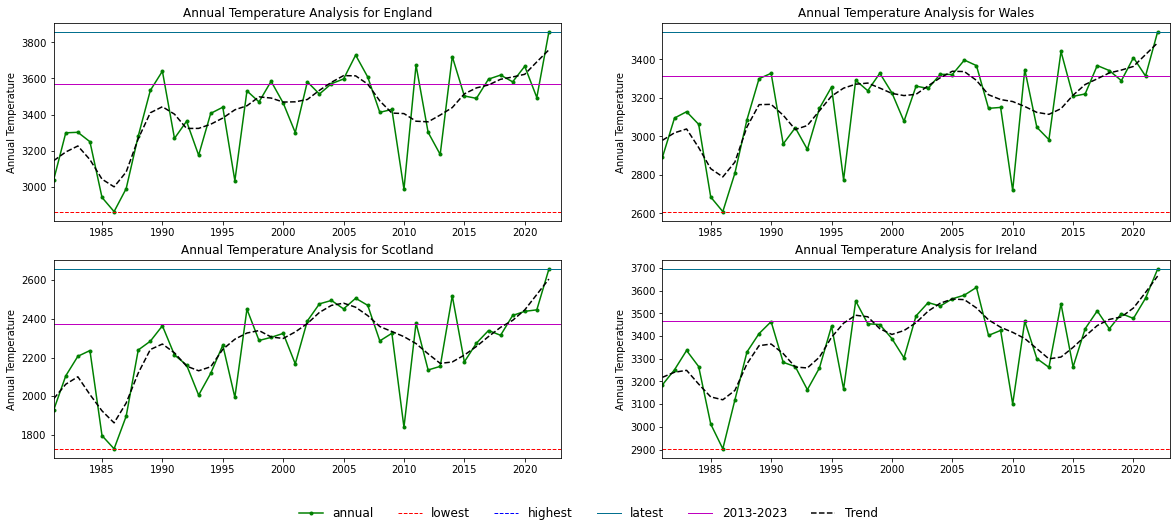

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

# Convert the 'date' column to a datetime object
data_en['date'] = pd.to_datetime(data_en['date'])
data_wl['date'] = pd.to_datetime(data_wl['date'])
data_sc['date'] = pd.to_datetime(data_sc['date'])
data_ir['date'] = pd.to_datetime(data_ir['date'])

# Extract the year from the 'date' column
data_en['year'] = data_en['date'].dt.year
data_sc['year'] = data_sc['date'].dt.year
data_wl['year'] = data_wl['date'].dt.year
data_ir['year'] = data_ir['date'].dt.year

# Calculate the yearly sum of temperature
data_en_avg = data_en.groupby('year')['T2M'].sum().reset_index()
data_sc_avg = data_sc.groupby('year')['T2M'].sum().reset_index()
data_wl_avg = data_wl.groupby('year')['T2M'].sum().reset_index()
data_ir_avg = data_ir.groupby('year')['T2M'].sum().reset_index()

# columns for output
data_en_avg.columns = ['year', 'ann']
data_wl_avg.columns = ['year', 'ann']
data_sc_avg.columns = ['year', 'ann']
data_ir_avg.columns = ['year', 'ann']


# List of place names and corresponding data frames
places = ['England', 'Wales', 'Scotland', 'Ireland']
data_frames = [data_en_avg, data_wl_avg, data_sc_avg, data_ir_avg]

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

# Initialize arrays to store common legend handles and labels
common_handles = []
common_labels = []

# Iterate over each place and its corresponding data frame
for i, (place, data) in enumerate(zip(places, data_frames)):
    # Exclude data for the year 2023
    data = data[data['year'] != 2023]
    
    # Calculate the annual sum of temperature per year
    annual_sum = data.groupby('year')['ann'].sum()
    
    # Calculate statistics for visualization
    lowest_temperature = annual_sum.min()
    highest_temperature = annual_sum.max()
    latest_year = annual_sum.index[-1]
    average_temperature_2014_2023 = annual_sum.loc[2013:2023].sum()/10
    
    # Calculate a smoothed trend line using LOWESS
    smoothed_trend_line = lowess(annual_sum.values, annual_sum.index, frac=0.15)[:, 1]
    
    # Plotting in the current subplot
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Plot the annual sum of temperature per year with markers and specific color
    line = ax.plot(annual_sum.index, annual_sum.values,color='g', label='annual' ,linewidth=1.5,marker='o',markersize=3)
    common_handles.append(line[0])
   
    # Plot the lowest, highest, latest, and average lines
    ax.axhline(lowest_temperature, color='r', linestyle='--', label='lowest',linewidth=1)
    ax.axhline(highest_temperature, color='b', linestyle='--', label='highest',linewidth=1)
    ax.axhline(annual_sum[latest_year], color='#03708f',  label='latest',linewidth=1)
    ax.axhline(average_temperature_2014_2023, color='m', label='2013-2023',linewidth=1)

    # Plot the smoothed trend line
    ax.plot(annual_sum.index, smoothed_trend_line, color='k', linestyle='--', label='Trend')

    # Set labels and title for the current subplot
    #ax.set_xlabel('Year')
    ax.set_ylabel('Annual Temperature')
    ax.set_title(f'Annual Temperature Analysis for {place}')
    ax.set_xlim(1981,2023)
     # Store labels for common legend
    if i==0:
        common_labels.extend(ax.get_legend_handles_labels()[1])  # Extend with subplot legend labels

    # Remove individual subplot legends
    ax.legend().set_visible(False)

# Add a common horizontal legend below the entire plot
fig.legend(labels=common_labels, loc='lower center', ncol=len(common_labels), frameon=False, fontsize=12)

plt.show()

## 3. Specific humidity trend analysis over the year

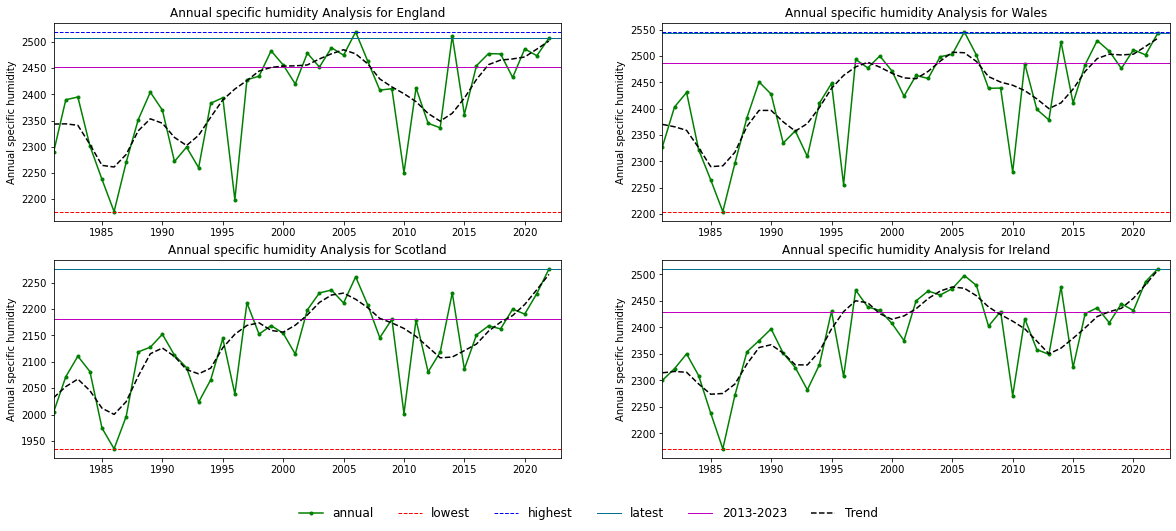

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

# Convert the 'date' column to a datetime object
data_en['date'] = pd.to_datetime(data_en['date'])
data_wl['date'] = pd.to_datetime(data_wl['date'])
data_sc['date'] = pd.to_datetime(data_sc['date'])
data_ir['date'] = pd.to_datetime(data_ir['date'])

# Extract the year from the 'date' column
data_en['year'] = data_en['date'].dt.year
data_sc['year'] = data_sc['date'].dt.year
data_wl['year'] = data_wl['date'].dt.year
data_ir['year'] = data_ir['date'].dt.year

# Calculate the yearly sum of specific_hum
data_en_avg = data_en.groupby('year')['SH2M'].sum().reset_index()
data_sc_avg = data_sc.groupby('year')['SH2M'].sum().reset_index()
data_wl_avg = data_wl.groupby('year')['SH2M'].sum().reset_index()
data_ir_avg = data_ir.groupby('year')['SH2M'].sum().reset_index()

#  columns for output
data_en_avg.columns = ['year', 'ann']
data_wl_avg.columns = ['year', 'ann']
data_sc_avg.columns = ['year', 'ann']
data_ir_avg.columns = ['year', 'ann']


# List of place names and corresponding data frames
places = ['England', 'Wales', 'Scotland', 'Ireland']
data_frames = [data_en_avg, data_wl_avg, data_sc_avg, data_ir_avg]

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

# Initialize arrays to store common legend handles and labels
common_handles = []
common_labels = []

# Iterate over each place and its corresponding data frame
for i, (place, data) in enumerate(zip(places, data_frames)):
    # Exclude data for the year 2023
    data = data[data['year'] != 2023]
    
    # Calculate the annual sum of specific humidity per year
    annual_sum = data.groupby('year')['ann'].sum()
    
    # Calculate statistics for visualization
    lowest_specific_hum = annual_sum.min()
    highest_specific_hum = annual_sum.max()
    latest_year = annual_sum.index[-1]
    average_specific_hum_2014_2023 = annual_sum.loc[2013:2023].sum()/10
    
    # Calculate a smoothed trend line using LOWESS
    smoothed_trend_line = lowess(annual_sum.values, annual_sum.index, frac=0.15)[:, 1]
    
    # Plotting in the current subplot
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Plot the annual sum of specific_hum per year with markers and specific color
    line = ax.plot(annual_sum.index, annual_sum.values,color='g', label='annual' ,linewidth=1.5,marker='o',markersize=3)
    common_handles.append(line[0])
   
    # Plot the lowest, highest, latest, and average lines
    ax.axhline(lowest_specific_hum, color='r', linestyle='--', label='lowest',linewidth=1)
    ax.axhline(highest_specific_hum, color='b', linestyle='--', label='highest',linewidth=1)
    ax.axhline(annual_sum[latest_year], color='#03708f',  label='latest',linewidth=1)
    ax.axhline(average_specific_hum_2014_2023, color='m', label='2013-2023',linewidth=1)

    # Plot the smoothed trend line
    ax.plot(annual_sum.index, smoothed_trend_line, color='k', linestyle='--', label='Trend')

    # Set labels and title for the current subplot
    #ax.set_xlabel('Year')
    ax.set_ylabel('Annual specific humidity')
    ax.set_title(f'Annual specific humidity Analysis for {place}')
    ax.set_xlim(1981,2023)
     # Store labels for common legend
    if i==0:
        common_labels.extend(ax.get_legend_handles_labels()[1])  # Extend with subplot legend labels

    # Remove individual subplot legends
    ax.legend().set_visible(False)

# Add a common horizontal legend below the entire plot
fig.legend(labels=common_labels, loc='lower center', ncol=len(common_labels), frameon=False, fontsize=12)

plt.show()

## 4. Relative humidity trend analysis over the year

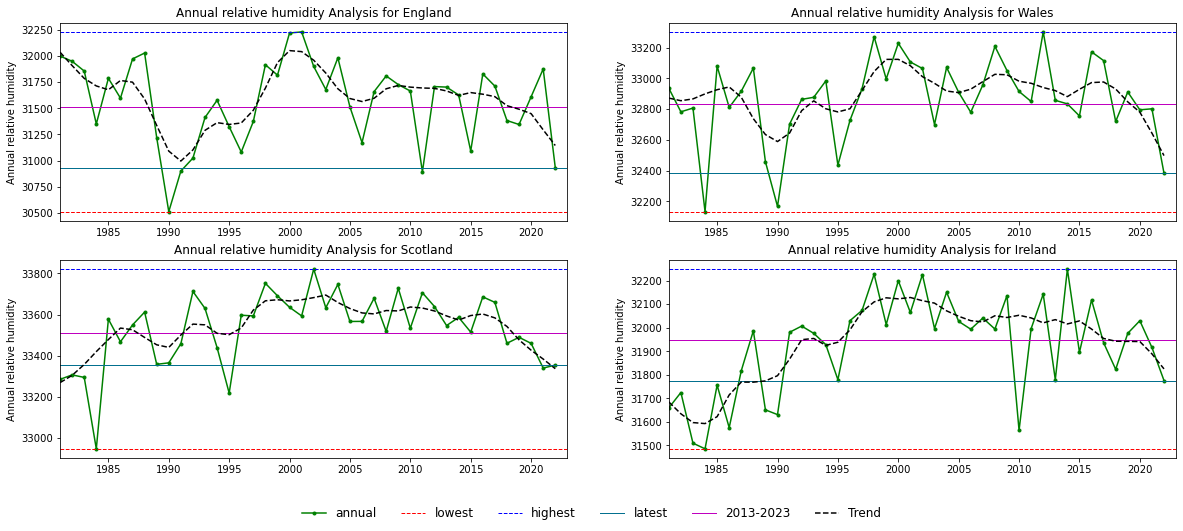

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

# Convert the 'date' column to a datetime object
data_en['date'] = pd.to_datetime(data_en['date'])
data_wl['date'] = pd.to_datetime(data_wl['date'])
data_sc['date'] = pd.to_datetime(data_sc['date'])
data_ir['date'] = pd.to_datetime(data_ir['date'])

# Extract the year from the 'date' column
data_en['year'] = data_en['date'].dt.year
data_sc['year'] = data_sc['date'].dt.year
data_wl['year'] = data_wl['date'].dt.year
data_ir['year'] = data_ir['date'].dt.year

# Calculate the yearly sum of relative_hum
data_en_avg = data_en.groupby('year')['RH2M'].sum().reset_index()
data_sc_avg = data_sc.groupby('year')['RH2M'].sum().reset_index()
data_wl_avg = data_wl.groupby('year')['RH2M'].sum().reset_index()
data_ir_avg = data_ir.groupby('year')['RH2M'].sum().reset_index()

# columns for output
data_en_avg.columns = ['year', 'ann']
data_wl_avg.columns = ['year', 'ann']
data_sc_avg.columns = ['year', 'ann']
data_ir_avg.columns = ['year', 'ann']


# List of place names and corresponding data frames
places = ['England', 'Wales', 'Scotland', 'Ireland']
data_frames = [data_en_avg, data_wl_avg, data_sc_avg, data_ir_avg]

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

# Initialize arrays to store common legend handles and labels
common_handles = []
common_labels = []

# Iterate over each place and its corresponding data frame
for i, (place, data) in enumerate(zip(places, data_frames)):
    # Exclude data for the year 2023
    data = data[data['year'] != 2023]
    
    # Calculate the annual sum of relative humidity per year
    annual_sum = data.groupby('year')['ann'].sum()
    
    # Calculate statistics for visualization
    lowest_relative_hum = annual_sum.min()
    highest_relative_hum = annual_sum.max()
    latest_year = annual_sum.index[-1]
    average_relative_hum_2014_2023 = annual_sum.loc[2013:2023].sum()/10
    
    # Calculate a smoothed trend line using LOWESS
    smoothed_trend_line = lowess(annual_sum.values, annual_sum.index, frac=0.15)[:, 1]
    
    # Plotting in the current subplot
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Plot the annual sum of relative_hum per year with markers and relative color
    line = ax.plot(annual_sum.index, annual_sum.values,color='g', label='annual' ,linewidth=1.5,marker='o',markersize=3)
    common_handles.append(line[0])
   
    # Plot the lowest, highest, latest, and average lines
    ax.axhline(lowest_relative_hum, color='r', linestyle='--', label='lowest',linewidth=1)
    ax.axhline(highest_relative_hum, color='b', linestyle='--', label='highest',linewidth=1)
    ax.axhline(annual_sum[latest_year], color='#03708f',  label='latest',linewidth=1)
    ax.axhline(average_relative_hum_2014_2023, color='m', label='2013-2023',linewidth=1)

    # Plot the smoothed trend line
    ax.plot(annual_sum.index, smoothed_trend_line, color='k', linestyle='--', label='Trend')

    # Set labels and title for the current subplot
    #ax.set_xlabel('Year')
    ax.set_ylabel('Annual relative humidity')
    ax.set_title(f'Annual relative humidity Analysis for {place}')
    ax.set_xlim(1981,2023)
     # Store labels for common legend
    if i==0:
        common_labels.extend(ax.get_legend_handles_labels()[1])  # Extend with subplot legend labels

    # Remove individual subplot legends
    ax.legend().set_visible(False)

# Add a common horizontal legend below the entire plot
fig.legend(labels=common_labels, loc='lower center', ncol=len(common_labels), frameon=False, fontsize=12)

plt.show()

## 5. Surface Pressure trend analysis over the year

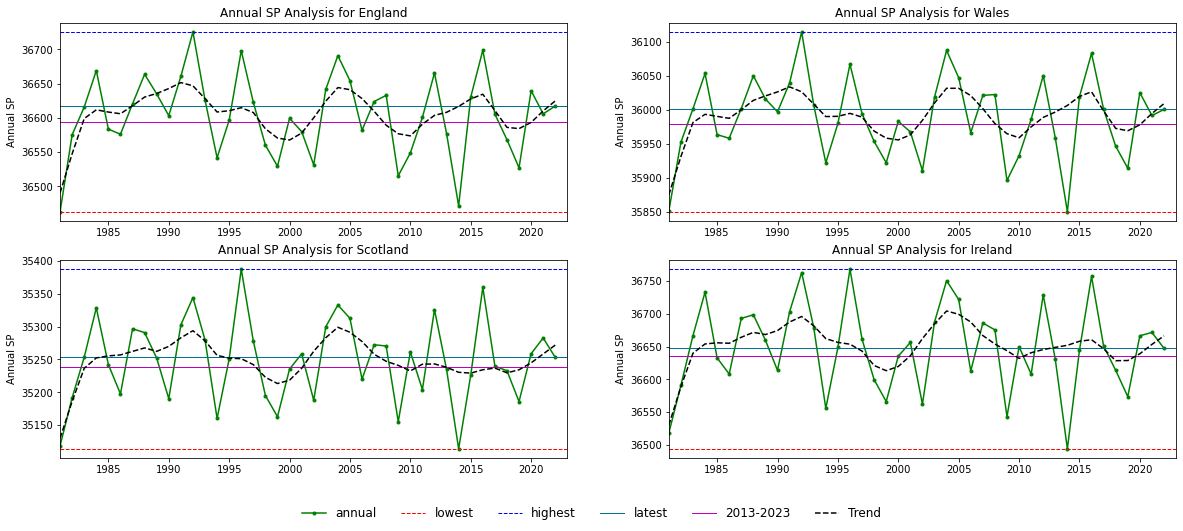

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

# Convert the 'date' column to a datetime object
data_en['date'] = pd.to_datetime(data_en['date'])
data_wl['date'] = pd.to_datetime(data_wl['date'])
data_sc['date'] = pd.to_datetime(data_sc['date'])
data_ir['date'] = pd.to_datetime(data_ir['date'])

# Extract the year from the 'date' column
data_en['year'] = data_en['date'].dt.year
data_sc['year'] = data_sc['date'].dt.year
data_wl['year'] = data_wl['date'].dt.year
data_ir['year'] = data_ir['date'].dt.year

# Calculate the yearly sum of SP_hum
data_en_avg = data_en.groupby('year')['SP'].sum().reset_index()
data_sc_avg = data_sc.groupby('year')['SP'].sum().reset_index()
data_wl_avg = data_wl.groupby('year')['SP'].sum().reset_index()
data_ir_avg = data_ir.groupby('year')['SP'].sum().reset_index()

#  columns for output
data_en_avg.columns = ['year', 'ann']
data_wl_avg.columns = ['year', 'ann']
data_sc_avg.columns = ['year', 'ann']
data_ir_avg.columns = ['year', 'ann']


# List of place names and corresponding data frames
places = ['England', 'Wales', 'Scotland', 'Ireland']
data_frames = [data_en_avg, data_wl_avg, data_sc_avg, data_ir_avg]

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

# Initialize arrays to store common legend handles and labels
common_handles = []
common_labels = []

# Iterate over each place and its corresponding data frame
for i, (place, data) in enumerate(zip(places, data_frames)):
    # Exclude data for the year 2023
    data = data[data['year'] != 2023]
    
    # Calculate the annual sum of SP humidity per year
    annual_sum = data.groupby('year')['ann'].sum()
    
    # Calculate statistics for visualization
    lowest_SP_hum = annual_sum.min()
    highest_SP_hum = annual_sum.max()
    latest_year = annual_sum.index[-1]
    average_SP_hum_2014_2023 = annual_sum.loc[2013:2023].sum()/10
    
    # Calculate a smoothed trend line using LOWESS
    smoothed_trend_line = lowess(annual_sum.values, annual_sum.index, frac=0.15)[:, 1]
    
    # Plotting in the current subplot
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Plot the annual sum of SP_hum per year with markers and SP color
    line = ax.plot(annual_sum.index, annual_sum.values,color='g', label='annual' ,linewidth=1.5,marker='o',markersize=3)
    common_handles.append(line[0])
   
    # Plot the lowest, highest, latest, and average lines
    ax.axhline(lowest_SP_hum, color='r', linestyle='--', label='lowest',linewidth=1)
    ax.axhline(highest_SP_hum, color='b', linestyle='--', label='highest',linewidth=1)
    ax.axhline(annual_sum[latest_year], color='#03708f',  label='latest',linewidth=1)
    ax.axhline(average_SP_hum_2014_2023, color='m', label='2013-2023',linewidth=1)

    # Plot the smoothed trend line
    ax.plot(annual_sum.index, smoothed_trend_line, color='k', linestyle='--', label='Trend')

    # Set labels and title for the current subplot
    #ax.set_xlabel('Year')
    ax.set_ylabel('Annual SP')
    ax.set_title(f'Annual SP Analysis for {place}')
    ax.set_xlim(1981,2023)
     # Store labels for common legend
    if i==0:
        common_labels.extend(ax.get_legend_handles_labels()[1])  # Extend with subplot legend labels

    # Remove individual subplot legends
    ax.legend().set_visible(False)

# Add a common horizontal legend below the entire plot
fig.legend(labels=common_labels, loc='lower center', ncol=len(common_labels), frameon=False, fontsize=12)

plt.show()

## 6. Wind speed trend analysis over the year

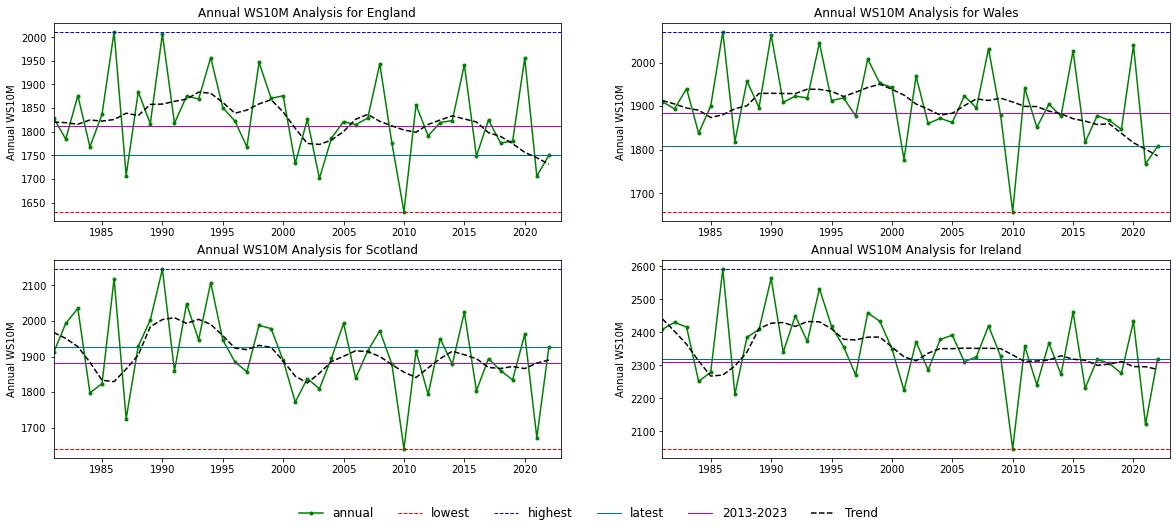

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

# Convert the 'date' column to a datetime object
data_en['date'] = pd.to_datetime(data_en['date'])
data_wl['date'] = pd.to_datetime(data_wl['date'])
data_sc['date'] = pd.to_datetime(data_sc['date'])
data_ir['date'] = pd.to_datetime(data_ir['date'])

# Extract the year from the 'date' column
data_en['year'] = data_en['date'].dt.year
data_sc['year'] = data_sc['date'].dt.year
data_wl['year'] = data_wl['date'].dt.year
data_ir['year'] = data_ir['date'].dt.year

# Calculate the yearly sum of WS10M_hum
data_en_avg = data_en.groupby('year')['WS10M'].sum().reset_index()
data_sc_avg = data_sc.groupby('year')['WS10M'].sum().reset_index()
data_wl_avg = data_wl.groupby('year')['WS10M'].sum().reset_index()
data_ir_avg = data_ir.groupby('year')['WS10M'].sum().reset_index()

#  columns for output
data_en_avg.columns = ['year', 'ann']
data_wl_avg.columns = ['year', 'ann']
data_sc_avg.columns = ['year', 'ann']
data_ir_avg.columns = ['year', 'ann']


# List of place names and correWS10Monding data frames
places = ['England', 'Wales', 'Scotland', 'Ireland']
data_frames = [data_en_avg, data_wl_avg, data_sc_avg, data_ir_avg]

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

# Initialize arrays to store common legend handles and labels
common_handles = []
common_labels = []

# Iterate over each place and its correWS10Monding data frame
for i, (place, data) in enumerate(zip(places, data_frames)):
    # Exclude data for the year 2023
    data = data[data['year'] != 2023]
    
    # Calculate the annual sum of WS10M humidity per year
    annual_sum = data.groupby('year')['ann'].sum()
    
    # Calculate statistics for visualization
    lowest_WS10M_hum = annual_sum.min()
    highest_WS10M_hum = annual_sum.max()
    latest_year = annual_sum.index[-1]
    average_WS10M_hum_2014_2023 = annual_sum.loc[2013:2023].sum()/10
    
    # Calculate a smoothed trend line using LOWESS
    smoothed_trend_line = lowess(annual_sum.values, annual_sum.index, frac=0.15)[:, 1]
    
    # Plotting in the current subplot
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Plot the annual sum of WS10M_hum per year with markers and WS10M color
    line = ax.plot(annual_sum.index, annual_sum.values,color='g', label='annual' ,linewidth=1.5,marker='o',markersize=3)
    common_handles.append(line[0])
   
    # Plot the lowest, highest, latest, and average lines
    ax.axhline(lowest_WS10M_hum, color='r', linestyle='--', label='lowest',linewidth=1)
    ax.axhline(highest_WS10M_hum, color='b', linestyle='--', label='highest',linewidth=1)
    ax.axhline(annual_sum[latest_year], color='#03708f',  label='latest',linewidth=1)
    ax.axhline(average_WS10M_hum_2014_2023, color='m', label='2013-2023',linewidth=1)

    # Plot the smoothed trend line
    ax.plot(annual_sum.index, smoothed_trend_line, color='k', linestyle='--', label='Trend')

    # Set labels and title for the current subplot
    #ax.set_xlabel('Year')
    ax.set_ylabel('Annual WS10M')
    ax.set_title(f'Annual WS10M Analysis for {place}')
    ax.set_xlim(1981,2023)
     # Store labels for common legend
    if i==0:
        common_labels.extend(ax.get_legend_handles_labels()[1])  # Extend with subplot legend labels

    # Remove individual subplot legends
    ax.legend().set_visible(False)

# Add a common horizontal legend below the entire plot
fig.legend(labels=common_labels, loc='lower center', ncol=len(common_labels), frameon=False, fontsize=12)

plt.show()

## 7. Wind direction trend analysis over the year

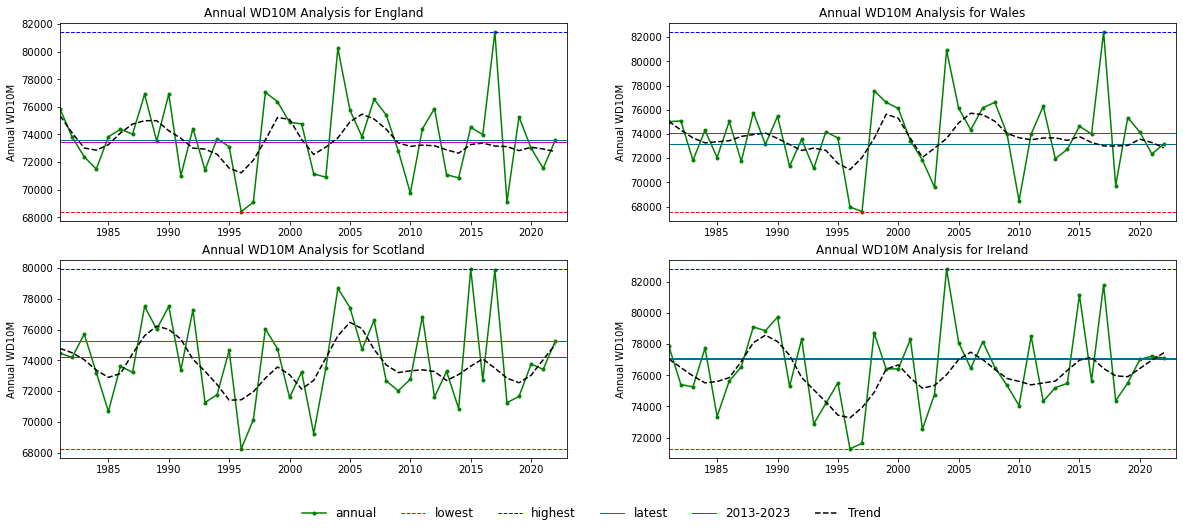

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

# Convert the 'date' column to a datetime object
data_en['date'] = pd.to_datetime(data_en['date'])
data_wl['date'] = pd.to_datetime(data_wl['date'])
data_sc['date'] = pd.to_datetime(data_sc['date'])
data_ir['date'] = pd.to_datetime(data_ir['date'])

# Extract the year from the 'date' column
data_en['year'] = data_en['date'].dt.year
data_sc['year'] = data_sc['date'].dt.year
data_wl['year'] = data_wl['date'].dt.year
data_ir['year'] = data_ir['date'].dt.year

# Calculate the yearly sum of WD10M_hum
data_en_avg = data_en.groupby('year')['WD10M'].sum().reset_index()
data_sc_avg = data_sc.groupby('year')['WD10M'].sum().reset_index()
data_wl_avg = data_wl.groupby('year')['WD10M'].sum().reset_index()
data_ir_avg = data_ir.groupby('year')['WD10M'].sum().reset_index()

#  columns for output
data_en_avg.columns = ['year', 'ann']
data_wl_avg.columns = ['year', 'ann']
data_sc_avg.columns = ['year', 'ann']
data_ir_avg.columns = ['year', 'ann']


# List of place names and correWD10Monding data frames
places = ['England', 'Wales', 'Scotland', 'Ireland']
data_frames = [data_en_avg, data_wl_avg, data_sc_avg, data_ir_avg]

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

# Initialize arrays to store common legend handles and labels
common_handles = []
common_labels = []

# Iterate over each place and its correWD10Monding data frame
for i, (place, data) in enumerate(zip(places, data_frames)):
    # Exclude data for the year 2023
    data = data[data['year'] != 2023]
    
    # Calculate the annual sum of WD10M humidity per year
    annual_sum = data.groupby('year')['ann'].sum()
    
    # Calculate statistics for visualization
    lowest_WD10M_hum = annual_sum.min()
    highest_WD10M_hum = annual_sum.max()
    latest_year = annual_sum.index[-1]
    average_WD10M_hum_2014_2023 = annual_sum.loc[2013:2023].sum()/10
    
    # Calculate a smoothed trend line using LOWESS
    smoothed_trend_line = lowess(annual_sum.values, annual_sum.index, frac=0.15)[:, 1]
    
    # Plotting in the current subplot
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Plot the annual sum of WD10M_hum per year with markers and WD10M color
    line = ax.plot(annual_sum.index, annual_sum.values,color='g', label='annual' ,linewidth=1.5,marker='o',markersize=3)
    common_handles.append(line[0])
   
    # Plot the lowest, highest, latest, and average lines
    ax.axhline(lowest_WD10M_hum, color='r', linestyle='--', label='lowest',linewidth=1)
    ax.axhline(highest_WD10M_hum, color='b', linestyle='--', label='highest',linewidth=1)
    ax.axhline(annual_sum[latest_year], color='#03708f',  label='latest',linewidth=1)
    ax.axhline(average_WD10M_hum_2014_2023, color='m', label='2013-2023',linewidth=1)

    # Plot the smoothed trend line
    ax.plot(annual_sum.index, smoothed_trend_line, color='k', linestyle='--', label='Trend')

    # Set labels and title for the current subplot
    #ax.set_xlabel('Year')
    ax.set_ylabel('Annual WD10M')
    ax.set_title(f'Annual WD10M Analysis for {place}')
    ax.set_xlim(1981,2023)
     # Store labels for common legend
    if i==0:
        common_labels.extend(ax.get_legend_handles_labels()[1])  # Extend with subplot legend labels

    # Remove individual subplot legends
    ax.legend().set_visible(False)

# Add a common horizontal legend below the entire plot
fig.legend(labels=common_labels, loc='lower center', ncol=len(common_labels), frameon=False, fontsize=12)

plt.show()